In [40]:
#lesa in gögn og pakka
import numpy as np
import matplotlib.pyplot as plt
KEN002 = np.loadtxt('KEN002.xy')
KEN004 = np.loadtxt('KEN004_vixl.xy')
KEN002_speglun = np.loadtxt('KEN002_Speglun.xy')
KEN004_speglun = np.loadtxt('KEN004_Speglun.xy')
###FASTAR
r0 = 2.82e-15
NA = 6.0221409e+23
lam = 1.54*10**(-10)
Ks=0.9
A = 106.42*1.660539040e-27#Kg
Z = 46

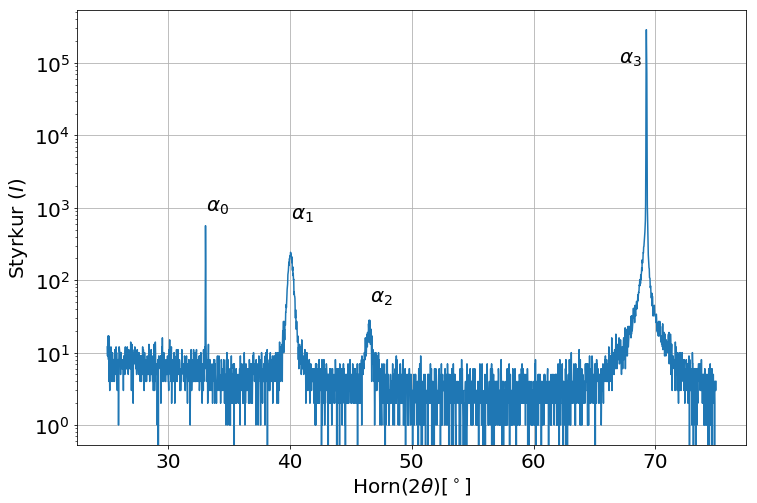

D: [4.73815753e-07 3.45853889e-08 2.88624632e-08 7.46800202e-07]
óvissa D:  [4.73869600e-07 2.31076842e-09 1.44843895e-09 4.98210650e-07]


In [41]:
###KEN002 plain

plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (12, 8))
plt.plot(KEN002[:,0],KEN002[:,1])

plt.yscale('log')
plt.xlabel('Horn($2 \\theta) [^\circ$]')
plt.ylabel('Styrkur $(I)$')
plt.text(33.1,900, '$\\alpha_0$')
plt.text(40.06,700, '$\\alpha_1$')
plt.text(46.6,50, '$\\alpha_2$')
plt.text(67,100000, '$\\alpha_3$')
plt.grid()
plt.savefig('KEN002.png')
plt.savefig('KEN002.PDF')
plt.show()
############## Scherrer
alpha2 = np.array([33.07,40.06,46.54,69.24])*2*np.pi/360
beta2 = np.array([0.02,0.3,0.4,0.03])*2*np.pi/360
D_beta2 = np.ones((len(beta2)))*0.02*2*np.pi/360
D_alpha2 = np.ones((len(beta2)))*0.01*2*np.pi/360

D2_sch = Ks*lam/(beta2*np.cos(alpha2))
D_D2_sch = D2_sch*(D_beta2/beta2 + D_alpha2*np.tan(alpha2))

print('D:', D2_sch)
print('óvissa D: ', D_D2_sch)

D: [1.54316054e-07 3.61647611e-08]
óvissa D:  [4.41151370e-08 2.26698862e-09]


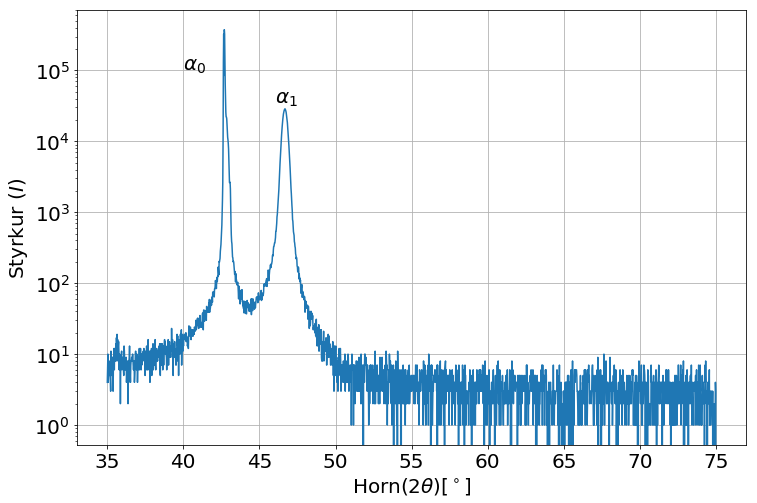

In [47]:
###KEN004


plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (12, 8))

#labs = np.linspace(40,50,100)
#2 theta toppar staðsetning
#2 theta breidd toppa
plt.plot(KEN004[:,0],KEN004[:,1])

plt.yscale('log')
plt.xlabel('Horn($2 \\theta) [^\circ$]')
plt.ylabel('Styrkur $(I)$')
plt.grid()
plt.text(40,100000, '$\\alpha_0$')
plt.text(46.06,35000, '$\\alpha_1$')
#plt.xticks(labs)
plt.savefig('KEN004.png')
plt.savefig('KEN004.PDF')
############## Scherrer
alpha4 = np.array([42.68, 46.67])*2*np.pi/360 # MgO 2-0-0 og Pd 2-0-0
beta4 = np.array([0.07,0.32])*2*np.pi/360
D_beta4 = np.ones((len(beta4)))*0.02*2*np.pi/360
D_alpha4 = np.ones((len(beta4)))*0.01*2*np.pi/360

D4_sch = Ks*lam/(beta4*np.cos(alpha4))
D_D4_sch = D4_sch*(D_beta4/beta4 + D_alpha4*np.tan(alpha4))

print('D:', D4_sch)
print('óvissa D: ', D_D4_sch)

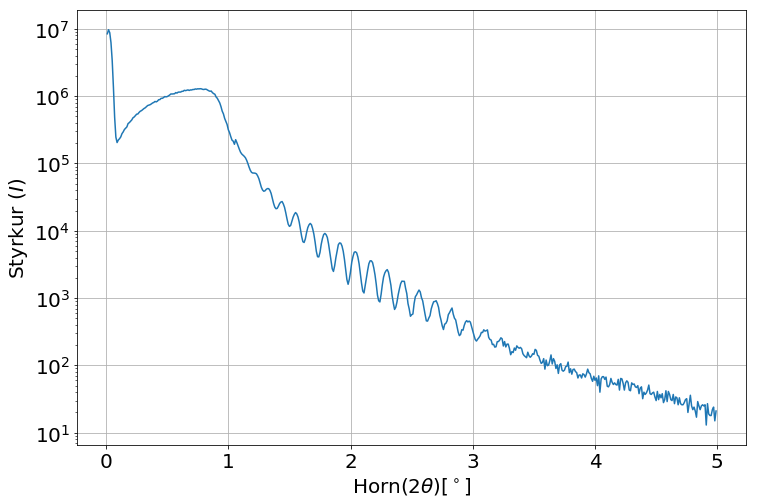

3.0739801362259016e-06 0.0001888781077460181
t  4.3917761588042224e-08
Massaþéttleiki Pd:  11131.497647171658 $\\pm$ 2473.666143815924


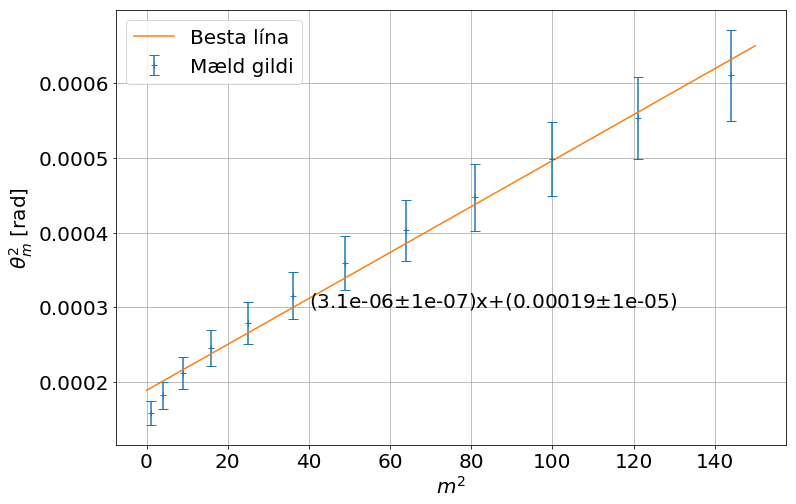

In [46]:
###KEN002 speglun


plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (12, 8))



plt.plot(KEN002_speglun[:,0],KEN002_speglun[:,1])

plt.yscale('log')
plt.xlabel('Horn($2 \\theta) [^\circ$]')
plt.ylabel('Styrkur $(I)$')
plt.grid()
plt.savefig('KEN002_spegl.png')
plt.savefig('KEN002_spegl.PDF')
plt.show()

####### Hallatölu graf
plt.figure(figsize = (12, 8))
theta2_m = np.array([1.441, 1.546, 1.670, 1.795, 1.915, 2.035, 2.173, 2.300, 2.424, 2.559, 2.695, 2.831])/2
theta2_m = theta2_m * np.pi/180
theta2_m = theta2_m**2
yerror = np.ones((len(theta2_m)))*0.05*2*theta2_m
m = np.arange(1,len(theta2_m)+1)**2

plt.errorbar(m,theta2_m, yerr=yerror, linestyle="None",fmt='+',capsize=5,label='Mæld gildi')
[a,b],V =np.polyfit(m,theta2_m,1,cov=True)
aErr = np.sqrt(V[0][0])
bErr = np.sqrt(V[1][1])
XX = np.linspace(0,150,50)
YY = a*XX + b
plt.plot(XX,YY,label='Besta lína')
plt.grid()
plt.xlabel('$m^2$')
plt.ylabel('$\\theta_m^2$ [rad]')
print(a,b)
plt.legend()
hallaStrengur = '('+str(np.round(a,7))+'$\pm$'+str(np.round(aErr,7))+')x+'
skurdStrengur ='('+ str(np.round(b,5))+'$\pm$'+str(np.round(bErr,5))+')'
linuStrengur = hallaStrengur + skurdStrengur
plt.text(40,0.0003,linuStrengur)
t = np.sqrt(lam**2/(4*a))
print('t ',t)
plt.savefig('halltala1.PDF')
plt.savefig('halltala1.png')

###########Alspeglunarhorn og massaþéttleiki húðarinnar
theta2C = 0.9*np.pi/180#mér sýnist vera við 0.9°
theta2C = theta2C/2#nú komið í rad og búið að deila með 2
D_theta2C = 0.05*np.pi/180
rho = theta2C**2*(A*np.pi/(r0*lam**2*Z))
D_rho = D_theta2C*2*rho/theta2C
print('Massaþéttleiki Pd: ', rho, r'$\\pm$', D_rho)

2.2704755438506528e-06 0.0001924211705334079
t  5.11013426459106e-08
D_t -6.282951881433841e-10
thetaC:  0.013871595817836096
D_thetaC:  0.0003733197692515981


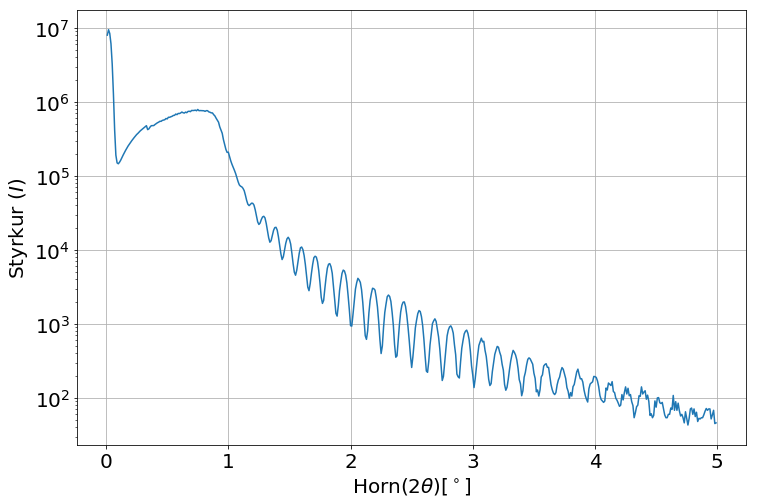

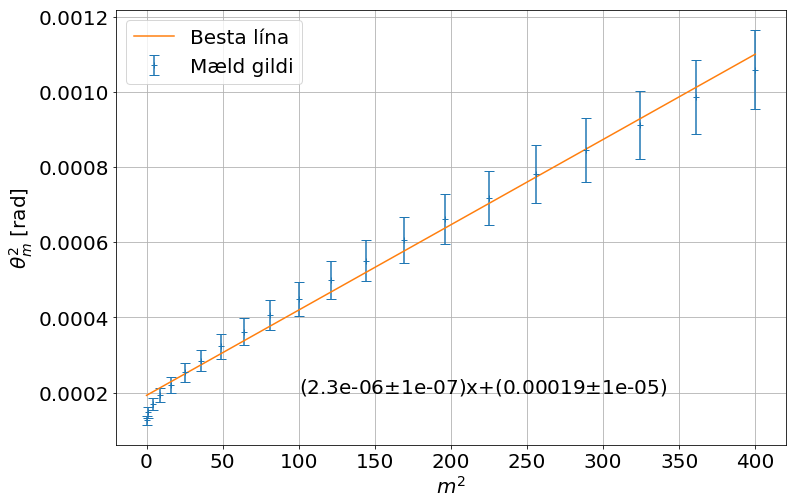

In [49]:
###KEN004 speglun


plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (12, 8))

#plt.figure(figsize = (200, 20))


#labs = np.linspace(1,4,80)

plt.plot(KEN004_speglun[:,0],KEN004_speglun[:,1])
#plt.xticks(labs)
plt.yscale('log')
plt.xlabel('Horn($ 2\\theta) [^\circ$]')
plt.ylabel('Styrkur $(I)$')
plt.grid()
plt.savefig('KEN004_spegl.png')
plt.savefig('KEN004_spegl.PDF')
####### Hallatölu graf
plt.figure(figsize = (12, 8))
theta4_m =np.array([1.285, 1.390, 1.490, 1.595, 1.700, 1.825, 1.935, 2.058, 2.180, 2.311, 2.430, 2.560, 2.690, 2.820, 2.950, 3.070, 3.203, 3.333, 3.460, 3.600, 3.730])/2
theta4_m = theta4_m * np.pi/180
theta4_m = theta4_m**2
yerror = np.ones((len(theta4_m)))*0.05*2*theta4_m
m4 = np.arange(len(theta4_m))**2
plt.errorbar(m4,theta4_m, yerr=yerror, linestyle="None",fmt='+',capsize=5,label='Mæld gildi')
[a,b],V =np.polyfit(m4,theta4_m,1,cov=True)
aErr = np.sqrt(V[0][0])
bErr = np.sqrt(V[1][1])
XX = np.linspace(0,400,50)
YY = a*XX + b
plt.plot(XX,YY,label='Besta lína')
plt.grid()
plt.xlabel('$m^2$')
plt.ylabel('$\\theta_m^2$ [rad]')
print(a,b)
plt.legend()
hallaStrengur = '('+str(np.round(a,7))+'$\pm$'+str(np.round(aErr,7))+')x+'
skurdStrengur ='('+ str(np.round(b,5))+'$\pm$'+str(np.round(bErr,5))+')'
linuStrengur = hallaStrengur + skurdStrengur
plt.text(100,0.0002,linuStrengur)
t = np.sqrt(lam**2/(4*a))
D_t = aErr*lam/2*(-0.5*a**(-3/2))
print('t ',t)
print('D_t', D_t)
thetaC = np.sqrt(b)
D_thetaC = bErr * (0.5*b**(-0.5))
print('thetaC: ', thetaC)
print('D_thetaC: ', D_thetaC)
plt.savefig('halltala2.PDF')
plt.savefig('halltala2.png')